In [1]:
import pandas as pd

In [4]:
cancer_data = pd.read_csv('cancer_figures.csv')
cancer_data

,year,male_deaths,female_deaths,total_deaths
0,2007,289550,270100,559650
1,2008,294120,271530,565650
2,2009,292540,269800,562340
3,2010,299200,270290,569490
4,2011,300430,271520,571950
5,2012,301820,275370,577190
6,2013,306920,273430,580350
7,2014,310010,275710,585720
8,2015,312150,277280,589430
9,2016,314290,281400,595690


In [5]:
import matplotlib.pyplot as plt

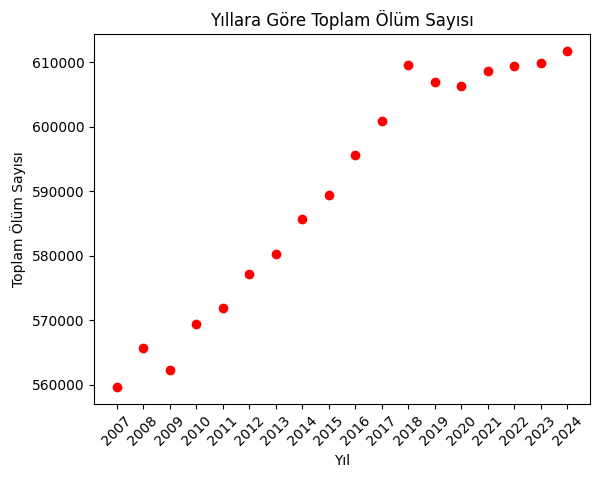

In [9]:
plt.scatter(cancer_data["year"], cancer_data["total_deaths"], color='red')
plt.xticks(cancer_data["year"], cancer_data["year"].astype(int), rotation=45)
plt.xlabel("Yıl")
plt.ylabel("Toplam Ölüm Sayısı")
plt.title("Yıllara Göre Toplam Ölüm Sayısı")
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()

In [12]:
model.fit(cancer_data[['year']], cancer_data['total_deaths'])

LinearRegression()

In [13]:
# modelki a ve b değerleri
model.coef_, model.intercept_

(array([3410.0619195]), np.float64(-6282941.465428276))

In [15]:
tahmin = model.predict([[2000]])
tahmin

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([537182.37358101])

In [17]:
tahminler = model.predict(cancer_data[['year']])

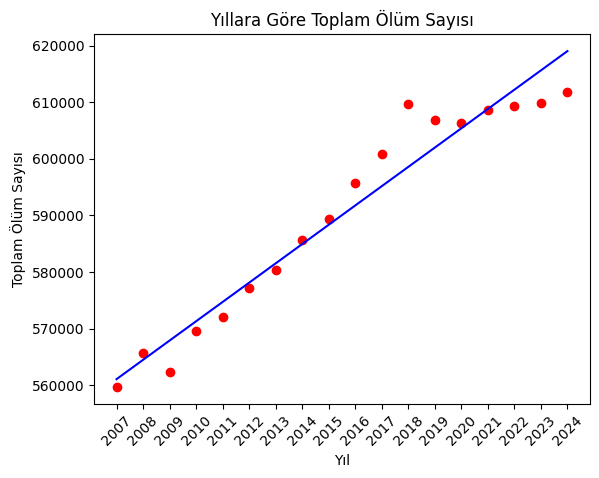

In [18]:
plt.scatter(cancer_data["year"], cancer_data["total_deaths"], color='red')
plt.xticks(cancer_data["year"], cancer_data["year"].astype(int), rotation=45)
plt.plot(cancer_data["year"], tahminler, color='blue')
plt.xlabel("Yıl")
plt.ylabel("Toplam Ölüm Sayısı")
plt.title("Yıllara Göre Toplam Ölüm Sayısı")
plt.show()

In [19]:
from sklearn.cluster import KMeans

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(cancer_data[['year', 'total_deaths']])
cancer_data['Küme'] = kmeans.labels_
cancer_data

,year,male_deaths,female_deaths,total_deaths,Küme
0,2007,289550,270100,559650,1
1,2008,294120,271530,565650,1
2,2009,292540,269800,562340,1
3,2010,299200,270290,569490,1
4,2011,300430,271520,571950,1
5,2012,301820,275370,577190,1
6,2013,306920,273430,580350,1
7,2014,310010,275710,585720,2
8,2015,312150,277280,589430,2
9,2016,314290,281400,595690,2


In [21]:
kmeans.cluster_centers_

array([[  2021.        , 608901.42857143],
       [  2010.        , 569517.14285714],
       [  2015.5       , 592940.        ]])

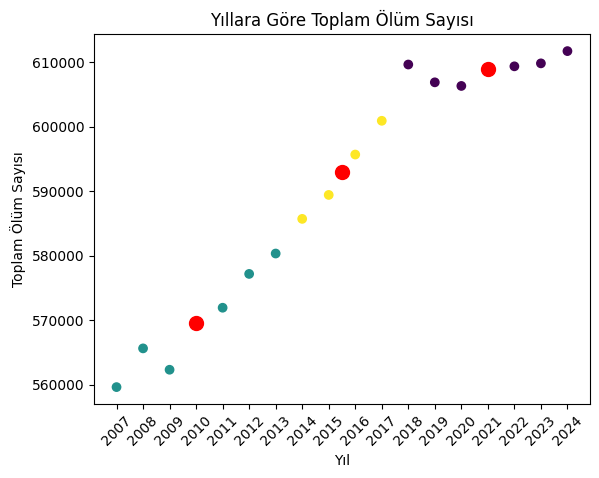

In [23]:
import matplotlib.pyplot as plt

plt.scatter(cancer_data["year"], cancer_data["total_deaths"], c=cancer_data['Küme'])
plt.xticks(cancer_data["year"], cancer_data["year"].astype(int), rotation=45)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.xlabel('Yıl')
plt.ylabel('Toplam Ölüm Sayısı')
plt.title('Yıllara Göre Toplam Ölüm Sayısı')
plt.show()